# Hotel booking demand project

Jiayi Xu

- <a href='#1'>Introduction</a>  
  - <a href='#10'>Data</a>  
  - <a href='#11'>Goal</a>  
  - <a href='#12'>Modeling(pending)</a>  
- <a href='#2'>Import</a> 
  - <a href='#20'>Libraries</a>   
  - <a href='#21'>Data</a>   
  - <a href='#22'>Data Dictionary</a> 
- <a href='#3'>Exploratory Data Analysis</a>
  - <a href='#31'>General Approach</a> 
  - <a href='#32'>Target variable</a> 
  - <a href='#33'>Inspect and Transform</a> 
- <a href='#4'>Data Modeling</a>
  - <a href='#41'>Feature Engineering</a> 
  - <a href='#42'>Model Evaluation</a> 




## <a id="1">1.Introduction</a>

### <a id="10">Data:</a>  
This [data set](https://www.kaggle.com/jessemostipak/hotel-booking-demand) contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.     

From the [publication]( https://www.sciencedirect.com/science/article/pii/S2352340918315191)
we know that both hotels are located in Portugal (southern Europe) ("H1 at the resort region of Algarve and H2 at the city of Lisbon"). The distance between these two locations is ca. 280 km by car and both locations border on the north atlantic. The data contains "bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017".

###  <a id="11">Goal:</a>
To predict the possibility of a booking for a hotel based on the previous_cancellation.

### <a id="12">Modeling(pending)</a>

## <a id="2">2.Import libraries and dataset</a> 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, plot, iplot
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode()
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# Load data
df = pd.read_csv('/Users/xujiayi/Desktop/DS面试题/Week2/hotel_bookings.csv')

# Number of rows/columns
df.shape        #The dataset initially contains 119,390 rows (hotel booking information) and 32 columns (‘variables’ or ‘features’ of each booking information).

(119390, 32)

In [281]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### <a id="22">Data dictionary</a> 
1.Hotel: (H1 = Resort Hotel or H2 = City Hotel)   
2.is_canceled: Value indicating if the booking was canceled (1) or not (0)   
3.lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date   
4.arrival_date_year:Year of arrival date   
5.arrival_date_month: Month of arrival date   
6.arrival_date_week_number:Week number of year for arrival date   
7.arrival_date_day_of_month:Day of arrival date  
8.stays_in_weekend_nights:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel   
9.stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  
10.adults:Number of adults  
11.children:Number of children  
12.meal:Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)    
13.country:Country of origin   
14.market_segment:Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”   
15.distribution_channel:Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”  
16.is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)  
17.previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
18.previous_bookings_not_canceled:Number of previous bookings not cancelled by the customer prior to the current booking  
19.reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.  
20.assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.  
21.booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation 
22.deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.  
23.agent: ID of the travel agency that made the booking   
24.company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons  
25.days_in_waiting_list:Number of days the booking was in the waiting list before it was confirmed to the customer  
26.customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking     
27.adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights   
28.required_car_parking_spaces :Number of car parking spaces required by the customer  
29.total_of_special_requests:Number of special requests made by the customer (e.g. twin bed or high floor)  
30.reservation_status:Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why 
31.reservation_status_date:Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel   
32 babies :Number of babies
  



## <a id="3">3.Exploratory Data Analysis</a>  

###  <a id="31">3.1 General Approach</a>

In [282]:
# missing value inspection
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [451]:
# 4 missing information in Children column
df["children"] = df["children"].fillna(0)

In [284]:
# 488 missing information in country
df["country"] = df['country'].fillna(0)

#####  The dataset initially contains 119,390 rows (hotel booking information) and 32 columns (‘variables’ or ‘features’ of each booking information).In some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent. Therefore,16,340 bookings without agents and 112,593 (94%) bookings weren't paid by company.

### <a id="32">3.2 Target Variable</a>

In [285]:
#Decriptive summary, look at target variable
print(df.groupby('hotel')['is_canceled'].value_counts())

# Booking cancellation summary
ch = df.loc[df["hotel"] == "City Hotel"].shape[0]
rh = df.loc[df["hotel"] == "Resort Hotel"].shape[0]
ch_rate = (df.loc[df["hotel"] == "City Hotel"].shape[0])/df.shape[0]*100
rh_rate = (df.loc[df["hotel"] == "Resort Hotel"].shape[0])/df.shape[0]*100
total_cancellations = df["is_canceled"].sum()
rh_cancellations = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancellations = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

# Cancellation rate per hotel category
rate_cancel = total_cancellations / df.shape[0] * 100
rh_rate_cancel = rh_cancellations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rate_cancel = ch_cancellations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

print("")
print(f"Total City Hotel bookings: {ch:,}({ch_rate:.2f} %)")
print(f"Total Resort Hotel bookings: {rh:,}({rh_rate:.2f} %)")
print(f"Total bookings canceled: {total_cancellations:}({rate_cancel:.2f} %) ")
print(f"Resort hotel bookings canceled: {rh_cancellations:,} ({rh_rate_cancel:.2f}%)")
print(f"City hotel bookings canceled: {ch_cancellations:,} ({ch_rate_cancel:.2f} %)")

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

Total City Hotel bookings: 79,330(66.45 %)
Total Resort Hotel bookings: 40,060(33.55 %)
Total bookings canceled: 44224(37.04 %) 
Resort hotel bookings canceled: 11,122 (27.76%)
City hotel bookings canceled: 33,102 (41.73 %)


##### The project focuses on predicting future hotel booking cancellation, more specifically the city hotel and resort hotel. ("H1 at the resort region of Algarve and H2 at the city of Lisbon") From the first inspection, we can tell that there were 79,330(66.45%) City hotel bookings with 33,102(41.73%) cancellation, and 40,060(33.55%) resort hotel bookings with 11,122(27.76%) cancellation. Overall, the total booking cancellation rate was 37.04%. 


In [296]:
#Dataset summary statistics by hotel
city = df.loc[df["hotel"] == "City Hotel"]
resort = df.loc[df["hotel"] == "Resort Hotel"]
city.describe()

is_canceled     lead_time  arrival_date_year  \
count  79330.000000  79330.000000       79330.000000   
mean       0.417270    109.735724        2016.174285   
std        0.493111    110.948526           0.699181   
min        0.000000      0.000000        2015.000000   
25%        0.000000     23.000000        2016.000000   
50%        0.000000     74.000000        2016.000000   
75%        1.000000    163.000000        2017.000000   
max        1.000000    629.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              79330.000000               79330.000000   
mean                  27.177449                  15.786625   
std                   13.398523                   8.728451   
min                    1.000000                   1.000000   
25%                   17.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             79330.000000          79330.000000  79330.000000   
mean                  0.795185              2.182957      1.850977   
std                   0.885026              1.456416      0.509292   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              3.000000      2.000000   
max                  16.000000             41.000000      4.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  79330.000000  79330.000000       79330.000000            79330.000000   
mean       0.091365      0.004941           0.025615                0.079743   
std        0.372168      0.084323           0.157983                0.415472   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max        3.000000     10.000000           1.000000               21.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    79330.000000     79330.000000  71199.000000   
mean                         0.132371         0.187369     28.144721   
std                          1.693411         0.608620     56.432181   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000      9.000000   
75%                          0.000000         0.000000     17.000000   
max                         72.000000        21.000000    509.000000   

           company  days_in_waiting_list           adr  \
count  3689.000000          79330.000000  79330.000000   
mean    145.271618              3.226774    105.304465   
std     119.774134             20.870890     43.602954   
min       8.000000              0.000000      0.000000   
25%      40.000000              0.000000     79.200000   
50%      91.000000              0.000000     99.900000   
75%     219.000000              0.000000    126.000000   
max     497.000000            391.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 79330.000000               79330.000000  
mean                      0.024367                   0.546918  
std                       0.154919                   0.780776  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000  

In [287]:
resort.describe()

is_canceled     lead_time  arrival_date_year  \
count  40060.000000  40060.000000       40060.000000   
mean       0.277634     92.675686        2016.121443   
std        0.447837     97.285315           0.722347   
min        0.000000      0.000000        2015.000000   
25%        0.000000     10.000000        2016.000000   
50%        0.000000     57.000000        2016.000000   
75%        1.000000    155.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              40060.000000               40060.000000   
mean                  27.140864                  15.821243   
std                   14.005441                   8.883708   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  24.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             40060.000000          40060.000000  40060.000000   
mean                  1.189815              3.128732      1.867149   
std                   1.147812              2.461329      0.697285   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              3.000000      2.000000   
75%                   2.000000              5.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  40060.000000  40060.000000       40060.000000            40060.000000   
mean       0.128682      0.013904           0.044383                0.101722   
std        0.445195      0.118998           0.205948                1.335115   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000      2.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    40060.000000     40060.000000  31851.000000   
mean                         0.146455         0.287968    217.571725   
std                          1.001955         0.726548     88.264489   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000    240.000000   
50%                          0.000000         0.000000    240.000000   
75%                          0.000000         0.000000    242.000000   
max                         30.000000        17.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  3108.000000          40060.000000  40060.000000   
mean    241.486165              0.527758     94.952930   
std     125.930668              7.428580     61.442418   
min       6.000000              0.000000     -6.380000   
25%     154.000000              0.000000     50.000000   
50%     223.000000              0.000000     75.000000   
75%     330.000000              0.000000    125.000000   
max     543.000000            185.000000    508.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 40060.000000                40060.00000  
mean                      0.138068                    0.61977  
std                       0.351001                    0.81393  
min                       0.000000                    0.00000  
25%                       0.000000                    0.00000  
50%                       0.000000  

##### When I compared the summary statistics between the two hotels, there are some interesting findings in adults, children, babies, and adr:
- Max adults: City(4) vs Resort(55) 
  - Assumption:Is 55 an outlier or they were coming to convention? By company?
- Max children: City(3) vs Resort(10)
  - Assumption: 10 children? Outlier? Were they having a birthday party?
- Max babies: City(10) vs Resort(2)
  - Assumption: 10 babies? Outlier? wrong input?
- adr
  - Average fee:City(104) > Resort(94);
  - Max fee: City(5400)?? Outlier? wrong imput?
  - Min fee: Resort(-6.38)?? return fee? or discount



### <a id="33">3.3 Inspect and Transform</a>

Before diving into the univariate analysis, attributes have been roughly divided into four groups: demographic related, time-related(seasonality), booking behaviors and stay behaviors.

- demographic related
 - adults, children, babies, country, customer_type, is_repeated_guest
- time-related
 - lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date
- booking behaviors
 - market_segment, distribution_channel, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, total_of_special_requests,required_car_parking_spaces, reservation_status, adr
- stay behaviors
 - stays_in_weekend_nights, stays_in_week_nights, meal
 

### <a id="331">3.3.1 demographic related analysis</a>

### Country analysis and transformation

In [288]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH

In [414]:
##### CN" and "CHN" should both represents China. 
df.loc[df.country == 'CN','country'] = 'CHN'

In [2]:
# Which nationality is most likely to cancel the booking
# Data cleaning
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 1]["country"].value_counts())
country_data.rename(columns = {"country": "Number of Guests"}, inplace=True)
country_data["Country"] = country_data.index
total_guests = country_data["Number of Guests"].sum()

country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 3)

# Show the Guest country distribution piechart
country_fig = px.pie(country_data, values='Number of Guests', names='Country',
             title='Cancellation nationality distribution piechart',
             hover_data=['Guests in %'], labels={'Guests in %':'Guests in %'})
country_fig.update_traces(textposition='inside', textinfo='percent+label')
#country_fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
country_fig.show()

In [3]:
# Where did the guests come from?
# Data cleaning
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns = {"country": "Number of Guests"}, inplace=True)
country_data["Country"] = country_data.index
total_guests = country_data["Number of Guests"].sum()

country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 3)

# Show the Guest nationality distribution piechart
country_fig = px.pie(country_data, values='Number of Guests', names='Country',
             title='Guests nationality distribution piechart',
             hover_data=['Guests in %'], labels={'Guests in %':'Guests in %'})
country_fig.update_traces(textposition='inside', textinfo='percent+label')
#country_fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
country_fig.show()

In [4]:
c = city.loc[city['is_canceled'] == 0].country

plt.figure(figsize = (10, 6))
sns.countplot(y = c, data = city, palette = 'Paired', 
             order = c.value_counts().iloc[:7].index)
plt.xticks(np.arange(0, 30000, 2000))
plt.title('Top 7 City Hotel guest nationality')
plt.show()

NameError: name 'city' is not defined

In [ ]:
r = resort.loc[resort['is_canceled'] == 0].country

plt.figure(figsize = (10, 6))
sns.countplot(y = r, data = resort, palette = 'Paired', 
             order = r.value_counts().iloc[:7].index)
plt.xticks(np.arange(0, 30000, 2000))
plt.title('Top 7 Resort Hotel guest nationality')
plt.show()

##### Nearly 1/3 (28%) guests come from Portgual(local). Majority of the guests were from Europe.There were 421 guests who stays in the hotel without filling in their ountry information. And Over 60% Portuguese guests cancelled the bookings. 
##### The City Hotel was more popular for French, German, English, Spainish, and Italian while the Resort Hotel was welcomed with the English, Spainish, Irish , French, German and Chinese. What's more, 716 cancellation out of 1562 bookings, Chinese also had 45% cancellation rate, which was average 10% percent higher than the European.  
##### In conclusion, locals and faraway tourists have higher probabilty to cancel the bookings.

### People related analysis and transformations

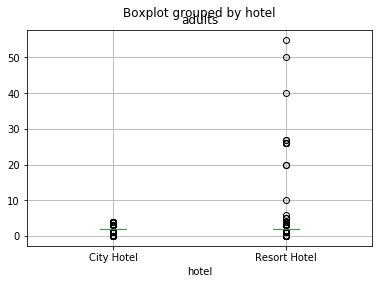

In [5]:
# Is 55 an outlier or they were coming to convention? By company?
df.boxplot(column = 'adults', by = 'hotel')
plt.show()

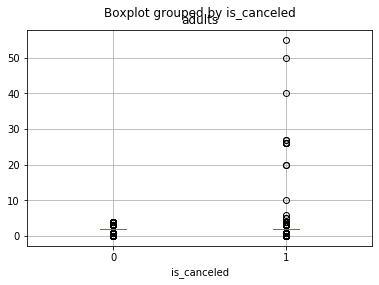

In [304]:
df.boxplot(column = 'adults', by = 'is_canceled')

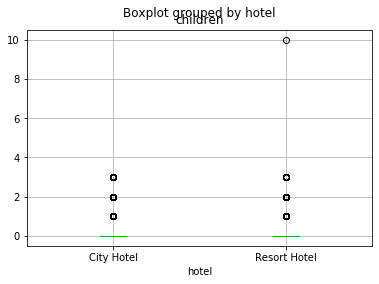

In [437]:
# 10 children? Outlier? Were they having a birthday party?
df.boxplot(column = 'children', by = 'hotel')
plt.show()

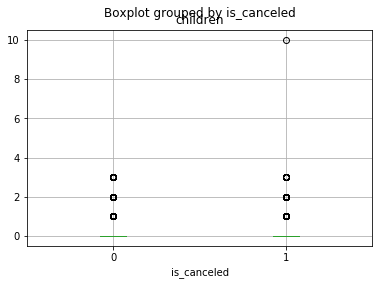

In [305]:
df.boxplot(column = 'children', by = 'is_canceled')
plt.show()

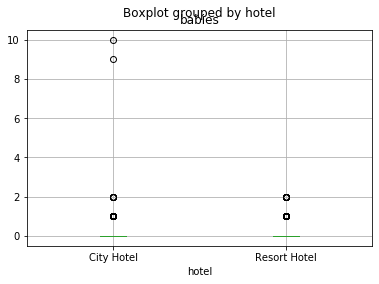

In [306]:
# 10 babies? Outlier? wrong input?
df.boxplot(column = 'babies', by = 'hotel')
plt.show()

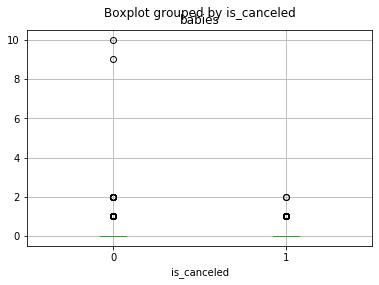

In [307]:
df.boxplot(column = 'babies', by = 'is_canceled')
plt.show()

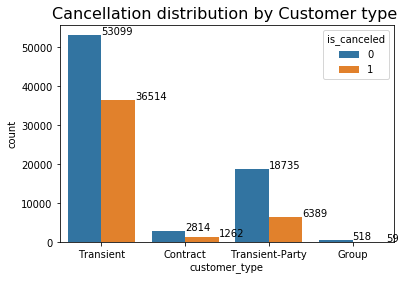

In [318]:
# Did repeated customers cancel the booking?
plt.title("Cancellation distribution by Customer type ", fontdict = {'fontsize': 16})
ax = sns.countplot(x = "customer_type", hue = 'is_canceled', data = df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

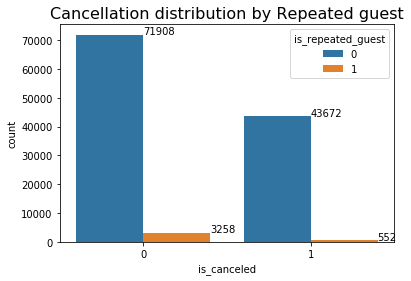

In [319]:
# Did repeated customers cancel the booking?
plt.title("Cancellation distribution by Repeated guest", fontdict = {'fontsize': 16})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

#### According to the people related analysis, we can find that :
##### - if the total adults are more than 5, the booking is appealing to be canceled. In our cases, the number more than 5, I treated them as outliers. Same reasons as children feature.  feature. Assumption: input mistakes.
##### -On the contrary, if you find surprising babies' data, maybe that's what the guests' intention. More cancellation occurred within two.
##### -Customer_type and is_ repeated_guest did have an impact on the cancellation. By calculating the cancellation ratio by customer type and repeated guests, Transient customers(68.7%), contract customers(44.8%), Transient-Party(34.1%) and Group(11.4%).  We can tell that if the customer is a transient type with higher uncertainty. The new guest(4.5%) had a higher cancellation rate than the repeated customer(1.2%).

### <a id="332">3.3.2 time-related related analysis</a>

### Time related analysis and transformations

Text(0.5, 0.98, 'Density Curve of Lead Time by Cancelation')

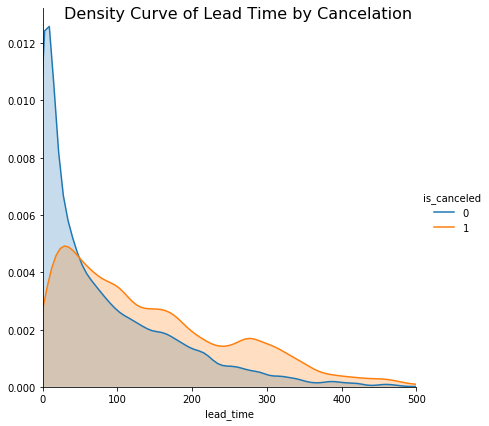

In [321]:
# lead time analysis
g = (sns.FacetGrid(df, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());
g.fig.suptitle('Density Curve of Lead Time by Cancelation', fontsize=16)

##### From the density plot, we can tell that the longer the lead time, the more probability to change the booking. The lead time of non-canceled bookings is more concentrated within 2 months.

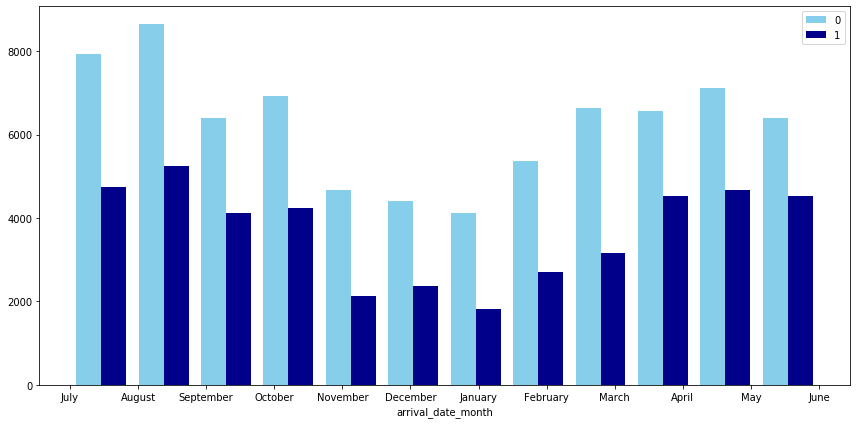

In [333]:
# Approach to the seasonal booking
a = df.loc[df['is_canceled'] == 0].arrival_date_month
b = df.loc[df['is_canceled'] == 1].arrival_date_month

n_bins = 12
fig, axe = plt.subplots(figsize=(12, 6))
colors = ['skyblue', 'darkblue']
axe.hist([a, b], n_bins, histtype='bar', color=colors, label=['0', '1'])
axe.set_xlabel('arrival_date_month')
axe.legend()
fig.tight_layout()
plt.show()

In [415]:
df_can = df.loc[df["is_canceled"] == 1]
df_can['Date'] = pd.to_datetime(df_can[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

In [416]:
# City hotel & resort hotel cancellation guests visualization
chdf_can = df_can.loc[df_can["hotel"] == "City Hotel"]
rhdf_can = df_can.loc[df["hotel"] == "Resort Hotel"]
chdf_can_guests_daily = chdf_can.groupby("Date")["hotel"].count()
rhdf_can_guests_daily = rhdf_can.groupby("Date")["hotel"].count()
city_guest_data = pd.DataFrame({"Date": list(chdf_can_guests_daily.index),
                    "hotel": "City hotel", 
                    "canceled guests": list(chdf_can_guests_daily.values)})
resort_guest_data = pd.DataFrame({"Date": list(rhdf_can_guests_daily.index),
                    "hotel": "Resort hotel", 
                    "canceled guests": list(rhdf_can_guests_daily.values)})

# Time Series line chart of city hotel guests cancellation
fig = px.line(city_guest_data, x="Date", y="canceled guests", title='Time Series line chart of city hotel guests cancellation')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [325]:
# Time Series line chart of Resort hotel guests cancellation
fig = px.line(resort_guest_data, x="Date", y="canceled guests", title='Time Series line chart of resort hotel guests cancellation')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

##### The two interactive line charts indicated the cancellation time series by the hotel. 
##### -Time: from July/1/2015-August/31/2017
##### -From the seasonal booking histogram, we can tell that people intended to go out during summer time, together with the higher booking cancellation. Conversely, colder weather hotels' booking decreased a lot.
##### -We can tell that resort hotel guests cancellation relatively flat except some noises. In most cases, it was lower than 30%, compared to the city hotel with around 40%.

#### <a id="323">3.2.3 booking behaviors related analysis</a>

### Money related analysis

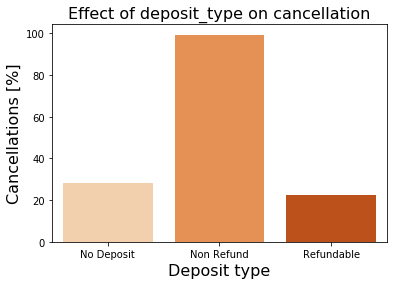

In [417]:
# deposit_type impact on cancellation:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

#show figure:
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100,palette = 'Oranges')
plt.title("Effect of deposit_type on cancellation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancellations [%]", fontsize=16)
plt.show()

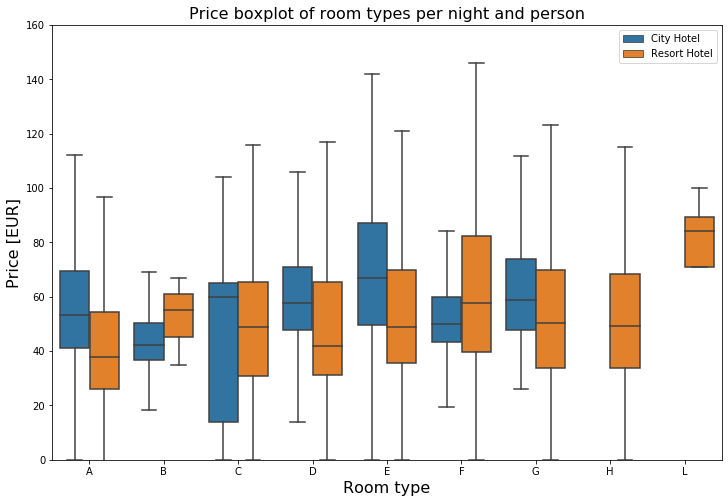

In [418]:
# Price
# normalize price per night (adr):
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
df_guests = df.loc[df["is_canceled"] == 0] # only actual guests
room_prices = df_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# price boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x = "reserved_room_type",
            y = "adr_pp",
            hue = "hotel",
            data = room_prices, 
            hue_order = ["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price boxplot of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

##### Money related analysis
##### -There was a higher cancellation rate accidentally among the Non-refund type(>95%). I assume that maybe we can book the room before paying. So when people found it's non-refundable, they decided to cancel the booking. Refundable transactions around 20% and non-deposit nearly 30% are reasonable.
##### - From the adr or the daily price rate boxplot, we can tell that the average city hotel price rate was higher than the Resort hotel. And Resort hotel offers more options for the room type. 

### Booking behavior analysis

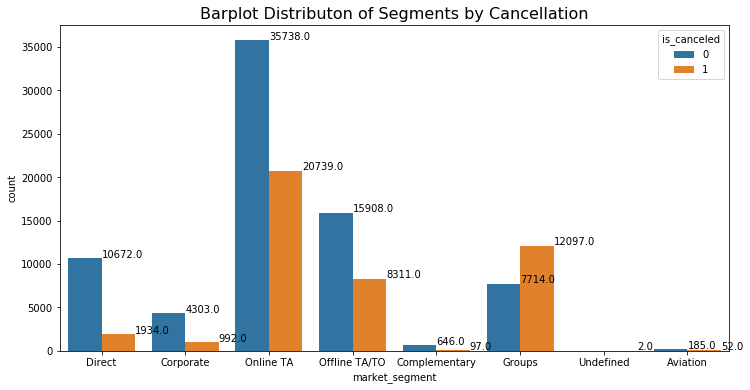

In [346]:
# Barplot Distributon of Segments by Cancellation
plt.figure(figsize = (12,6))
plt.title("Barplot Distributon of Segments by Cancellation", fontdict = {'fontsize':16})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

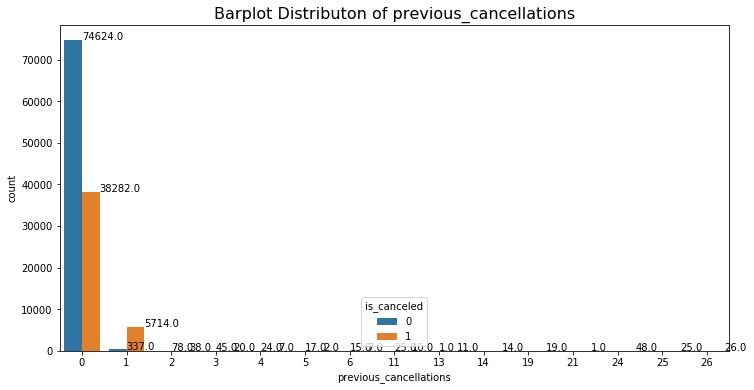

In [438]:
# Barplot Distributon of previous_cancellations by Cancellation
plt.figure(figsize = (12,6))
plt.title("Barplot Distributon of previous_cancellations", fontdict = {'fontsize':16})
ax = sns.countplot(x = "previous_cancellations", hue = 'is_canceled', data = df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

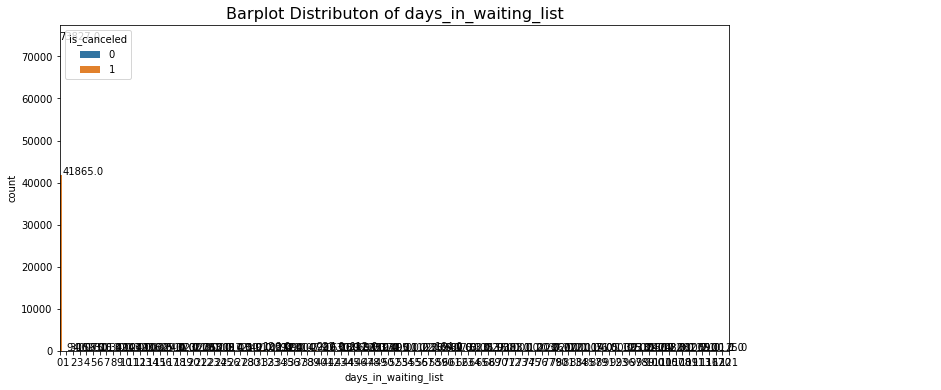

In [384]:
# Barplot Distributon of Segments by Cancellation
plt.figure(figsize = (12,6))
plt.title("Barplot Distributon of days_in_waiting_list", fontdict = {'fontsize':16})

ax = sns.countplot(x = "days_in_waiting_list", hue = 'is_canceled', data = df)
plt.xlim(0, 100)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

##### Booking behavior analysis:
##### -Most of the transactions came from the online TA. And the bookings from groups had a much higher cancellation possibility.
##### -Customers have a higher chance to cancel the booking if this is their first two bookings.
##### -If the customer is in a waitlist, he may have a higher intention to change or cancel the booking.

### Stay behaviors analysis

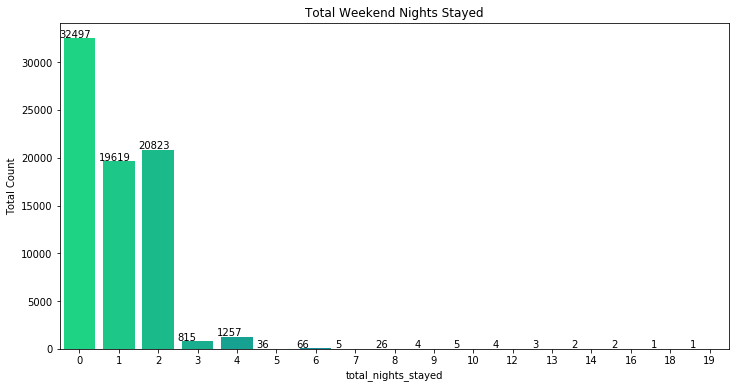

In [419]:
#stays in weekednd nights
plt.figure(figsize=(12,6))
ax = sns.countplot(x="stays_in_weekend_nights", data = df_guests, palette="winter_r")
plt.title('Total Weekend Nights Stayed')
plt.xlabel('total_nights_stayed')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()-0.1 , p.get_height()+100)) 


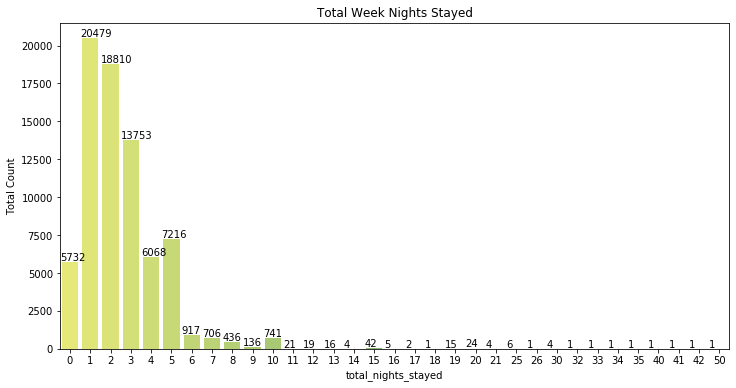

In [420]:
#stays in weekednd nights
plt.figure(figsize=(12,6))
ax = sns.countplot(x="stays_in_week_nights", data = df_guests, palette="summer_r")
plt.title('Total Week Nights Stayed')
plt.xlabel('total_nights_stayed')
plt.ylabel('Total Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()-0.1 , p.get_height()+100)) 

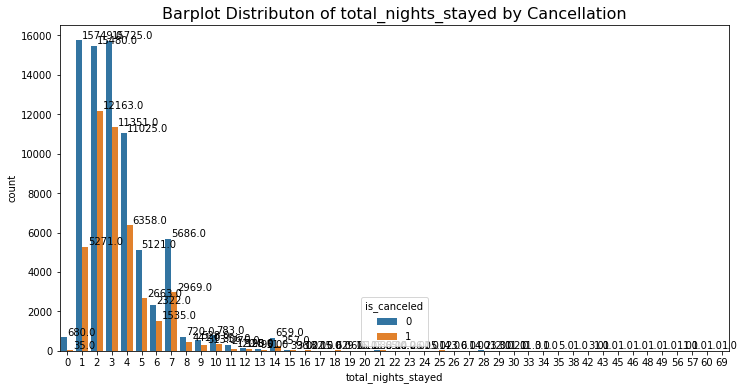

In [421]:
df['total_nights_stayed'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.figure(figsize = (12,6))
plt.title("Barplot Distributon of total_nights_stayed by Cancellation", fontdict = {'fontsize':16})
ax = sns.countplot(x = "total_nights_stayed", hue = 'is_canceled', data = df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

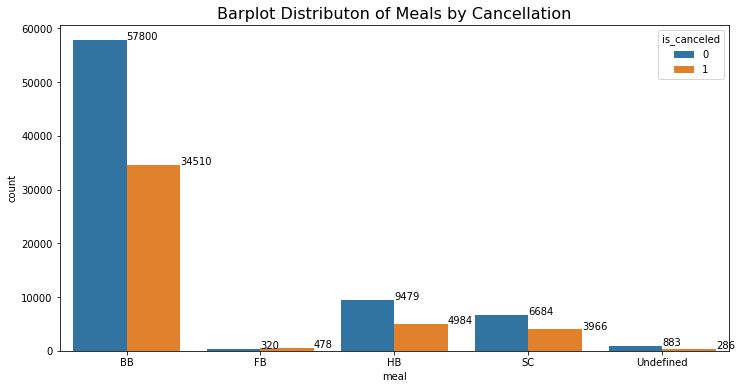

In [401]:
# Barplot Distributon of Segments by Cancellation
plt.figure(figsize = (12,6))
plt.title("Barplot Distributon of Meals by Cancellation", fontdict = {'fontsize':16})
ax = sns.countplot(x = "meal", hue = 'is_canceled', data = df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

##### Staying behavior analysis:
##### -Weekend nights stayed more concentrated within 2 days. It indicated the Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. Weeknights stayed more concentrated from 1 to 3 days. When we combine the nights, we can find 2 and 3 days have a higher rate to be canceled or revised.
##### -Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch, and dinner). FB, BB, and SC have higher rates to be changed.


## <a id="4">4.Data Modeling</a>

In [455]:
# correlation analysis
corr_matrix = df.corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

OUTPUT_LABEL                      1.000000
is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
adr_pp                            0.017871
total_nights_stayed               0.017779
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_ca

In [453]:
#Take selected numercial data
df_numerical = df.loc[:, ['is_canceled', 'lead_time', 'arrival_date_week_number', 
                          'arrival_date_day_of_month', 'total_nights_stayed','adults', 'children', 'babies',  
                          'previous_cancellations', 'previous_bookings_not_canceled', 
                          'booking_changes', 'days_in_waiting_list', 'adr', 
                          'required_car_parking_spaces', 'total_of_special_requests']]

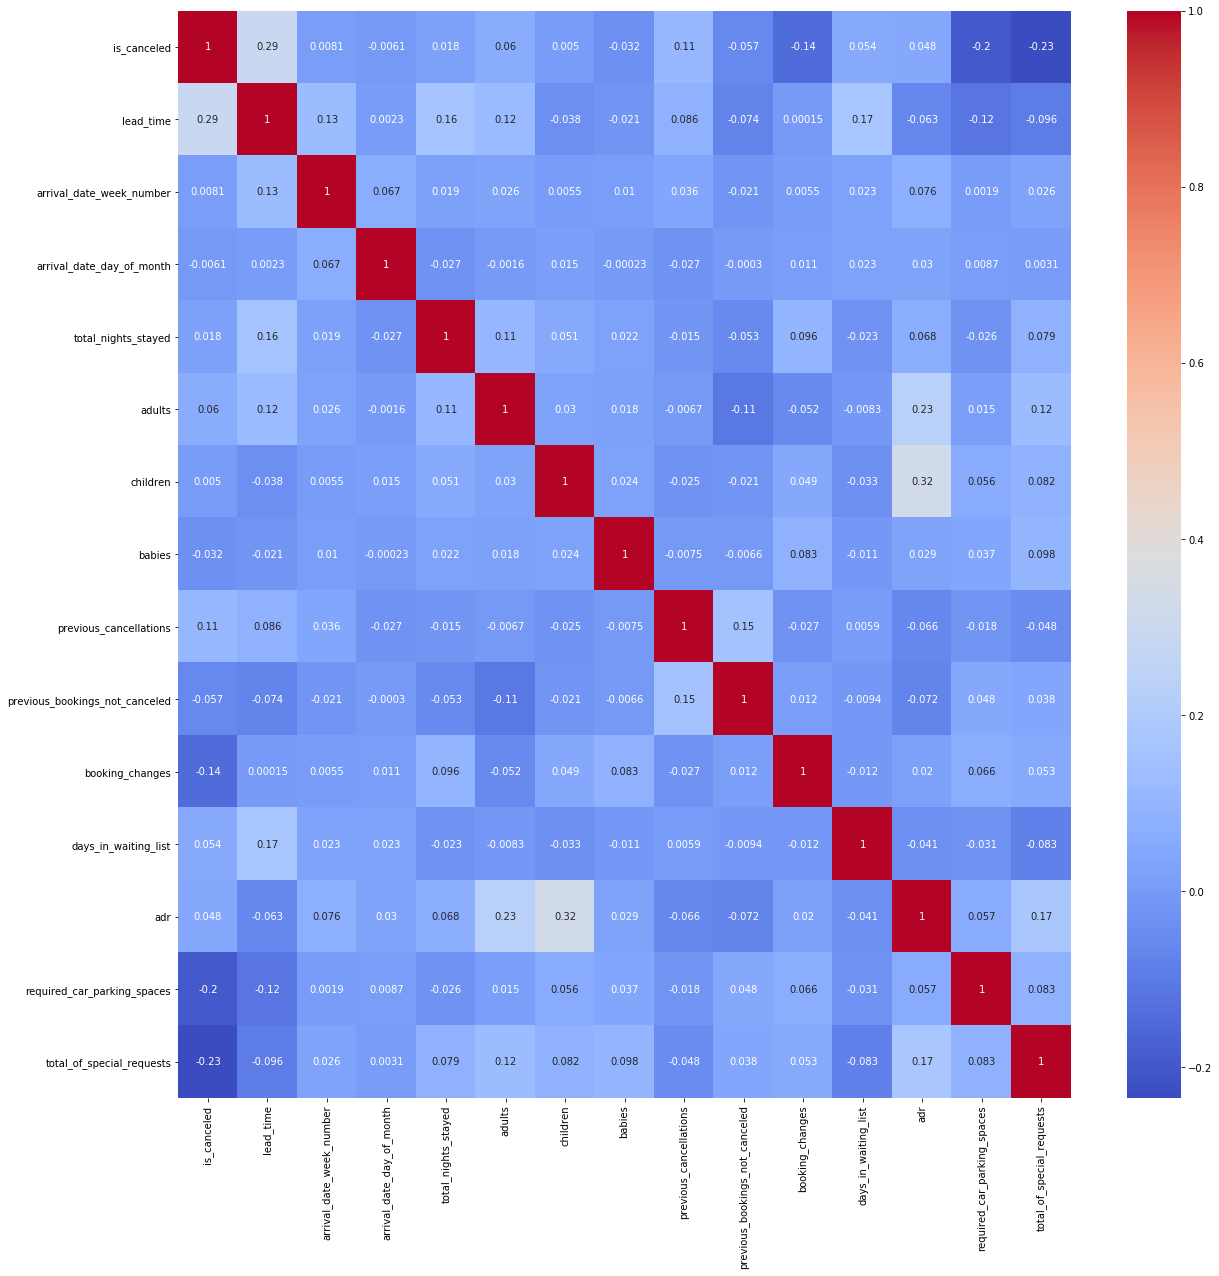

In [454]:
# Correlation heatmap
corrmat = df_numerical.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm")

##### From the heatmap we can see that:
##### - cancellation is highly related to the lead time, followed by previous_cancellations. Also total_of_special_requests and required_car_parking_spaces had negative correlation with the cancellation.
##### - 'adr' has some positive correlation with 'children' and 'adults'.

## Feature Engineering

In [448]:
df['OUTPUT_LABEL'] = (df.is_canceled).astype('int') # in other cases, the target variable was not 0/1.

### Numerical Features Analysis

In [449]:
cols_num = [ 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 
            'total_nights_stayed','adults', 'children', 'babies',  
            'previous_cancellations', 'previous_bookings_not_canceled', 
            'booking_changes', 'days_in_waiting_list', 'adr', 
             'required_car_parking_spaces', 'total_of_special_requests']

In [452]:
df[cols_num].isnull().sum()

lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
total_nights_stayed               0
adults                            0
children                          0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

### Categorical Feature Analysis

##### Hereunder is the list of the categorical features:
hotel
#####  - demographic related
 - country(x, for too many missing values), customer_type, is_repeated_guest
##### - time-related
 - arrival_date_year(x,not for the future forecasting purpose), 
 - arrival_date_month, , reservation_status_date(x, same as the other date metrics)
##### - booking behaviors
 - market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, 
 - agent(x), company(x, for too many missing values), reservation_status(x, same as the target value), 
##### - stay behaviors
 - meal



In [464]:
df.is_repeated_guest = df.is_repeated_guest.astype('category')

In [465]:
cols_cat = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'is_repeated_guest',
            'distribution_channel', 'reserved_room_type', 'deposit_type', 
            'customer_type']

In [466]:
df[cols_cat].isnull().sum()

hotel                   0
arrival_date_month      0
meal                    0
market_segment          0
is_repeated_guest       0
distribution_channel    0
reserved_room_type      0
deposit_type            0
customer_type           0
dtype: int64

In [476]:
df_cat = pd.get_dummies(df[cols_cat])
df_cat.head()

hotel_City Hotel  hotel_Resort Hotel  arrival_date_month_April  \
0                 0                   1                         0   
1                 0                   1                         0   
2                 0                   1                         0   
3                 0                   1                         0   
4                 0                   1                         0   

   arrival_date_month_August  arrival_date_month_December  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   arrival_date_month_February  arrival_date_month_January  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   arrival_date_month_July  arrival_date_month_June  arrival_date_month_March  \
0                        1                        0                         0   
1                        1                        0                         0   
2                        1                        0                         0   
3                        1                        0                         0   
4                        1                        0                         0   

   ...  reserved_room_type_H  reserved_room_type_L  reserved_room_type_P  \
0  ...                     0                     0                     0   
1  ...                     0                     0                     0   
2  ...                     0                     0                     0   
3  ...                     0                     0                     0   
4  ...                     0                     0                     0   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   customer_type_Contract  customer_type_Group  customer_type_Transient  \
0                       0                    0                        1   
1                       0                    0                        1   
2                       0                    0                        1   
3                       0                    0                        1   
4                       0                    0                        1   

   customer_type_Transient-Party  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 51 columns]

In [477]:
df = pd.concat([df, df_cat], axis = 1)

In [478]:
cols_all_cat = list(df_cat.columns)

In [479]:
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:', len(cols_num))
print('Categorical Features:', len(cols_all_cat))

Total number of features: 65
Numerical Features: 14
Categorical Features: 51


In [480]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [484]:
df_data['children'] = (df_data.children).astype('int')

In [485]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 66 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_week_number        119390 non-null  int64  
 2   arrival_date_day_of_month       119390 non-null  int64  
 3   total_nights_stayed             119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119390 non-null  int64  
 6   babies                          119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  days_in_waiting_list            119390 non-null  int64  
 11  adr                             119390 non-null  float64
 12  required_car_par

##### Feature engineering is very important for future modeling. From this step, I selected 65 features, which consist of 14 numerical features and 51 categorical features.

## Model

### Data preparation

In [487]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 11)
df_data = df_data.reset_index(drop = True)

In [488]:
# Train, validation and test split
df_valid_test = df_data.sample(frac = 0.30,random_state = 11)

In [489]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 11)
df_valid = df_valid_test.drop(df_test.index)

In [490]:
df_train = df_data.drop(df_valid_test.index)

In [491]:
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

print('Training shapes:', X_train.shape, y_train.shape)
print('Validation shapes:', X_valid.shape, y_valid.shape)
print('Test shapes:', X_test.shape, y_test.shape)

Training shapes: (83573, 65) (83573,)
Validation shapes: (17909, 65) (17909,)
Test shapes: (17908, 65) (17908,)


### Features Scaling

In [493]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

In [494]:
scaler.fit(X_train)
scaler.fit(X_valid)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [495]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

### Performance metrics

In [608]:
def show_metrics(y_true, y_score):
    # True positive
    tp = np.sum(y_true * y_score)
    # False positive
    fp = np.sum((y_true == 0) * y_score)
    # True negative
    tn = np.sum((y_true==0) * (y_score==0))
    # False negative
    fn = np.sum(y_true * (y_score==0))

    # Accuracy
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    # True positive rate (sensitivity or recall)
    tpr = tp / (tp + fn)
    # False positive rate (fall-out)
    fpr = fp / (fp + tn)
    # Precision
    precision = tp / (tp + fp)
    # True negatvie tate (specificity)
    tnr = 1 - fpr
    # F1 score
    f1 = 2*tp / (2*tp + fp + fn)
    # MCC
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    
    print("True positive: ", tp)
    print("False positive: ", fp)
    print("True negative: ", tn)
    print("False negative: ", fn)
    print("accuracy: ", accuracy)
    print("specifity: ", tnr)
    print("recall: ", tpr)
    print("Precision: ", precision)
    print("F1: ", f1)
    print("MCC: ", mcc)
    
    return accuracy, tnr, tpr, precision, f1, mcc

##### Overall, we want our models output with higher accuracy, higher recall and higher precision rate. Compare the latter two metrics, we'd rather have higher FN than FP. Because that will be better if the guests want to book the room and we have the capability to host them. Therefore, we want to have higher precision rate.

### Baseline Models

#### Logistic Regression

In [609]:
lr = LogisticRegression()
lr.fit(X_train_tf, y_train)

/Users/xujiayi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [610]:
y_train_preds = lr.predict(X_train_tf)
y_valid_preds = lr.predict(X_valid_tf)

In [621]:
print('Logistic Regression')
print('Training')
lr_train_accuracy, lr_train_specificity, lr_train_recall, lr_train_precision, lr_train_f1, lr_train_MCC,\
   = show_metrics(y_train, y_train_preds.astype(np.int))
print('Validation')
lr_valid_accuracy, lr_valid_specificity, lr_valid_recall, lr_valid_precision, lr_valid_f1, lr_valid_MCC, \
  = show_metrics(y_valid, y_valid_preds.astype(np.int))

Logistic Regression
Training
True positive:  18668
False positive:  3595
True negative:  49067
False negative:  12243
accuracy:  0.8104890335395403
specifity:  0.9317344574835745
recall:  0.6039274044838407
Precision:  0.8385213133899295
F1:  0.702147666152631
MCC:  0.5849765102277167
Validation
True positive:  4047
False positive:  790
True negative:  10452
False negative:  2620
accuracy:  0.8095929420961527
specifity:  0.9297278064401352
recall:  0.6070196490175491
Precision:  0.836675625387637
F1:  0.7035813630041725
MCC:  0.5843835051645041


##### The training and validation output metrics are almost the same. The accuracy are 0.80 which is fair enough. And precision rates are around 0.83.

#### Decision Tree

In [622]:
tree = DecisionTreeClassifier()
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [623]:
y_train_preds = tree.predict(X_train_tf)
y_valid_preds = tree.predict(X_valid_tf)

In [624]:
print('Decision tree')
print('Training')
tree_train_accuracy, tree_train_specificity, tree_train_recall, tree_train_precision, tree_train_f1, tree_train_MCC, \
 = show_metrics(y_train, y_train_preds.astype(np.int))
print('Validation')
tree_valid_accuracy, tree_valid_specificity, tree_valid_recall, tree_valid_precision, tree_valid_f1, tree_valid_MCC, \
  = show_metrics(y_valid, y_valid_preds.astype(np.int))

Decision tree
Training
True positive:  30363
False positive:  142
True negative:  52520
False negative:  548
accuracy:  0.9917437449894104
specifity:  0.9973035585431621
recall:  0.9822716832195658
Precision:  0.9953450254056712
F1:  0.9887651426338413
MCC:  0.9822931761324436
Validation
True positive:  5123
False positive:  1742
True negative:  9500
False negative:  1544
accuracy:  0.8165168351108382
specifity:  0.8450453655933108
recall:  0.768411579421029
Precision:  0.7462490895848507
F1:  0.7571681939107301
MCC:  0.609940730832159


##### We can tell there's a overfiting in our desicion tree models. The validation valuation metrics are much lower than the training valuation metrics. And the precision rate is a litlle bit lower(0.74).

#### Random Forest

In [625]:
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [626]:
y_train_preds = rf.predict(X_train_tf)
y_valid_preds = rf.predict(X_valid_tf)

In [628]:
print('Random forest')
print('Training')
rf_train_accuracy, rf_train_specificity, rf_train_recall, rf_train_precision, rf_train_f1, rf_train_MCC,\
 = show_metrics(y_train, y_train_preds.astype(np.int))
print('Validation')
rf_valid_accuracy, rf_valid_specificity, rf_valid_recall, rf_valid_precision, rf_valid_f1, rf_valid_MCC, \
 = show_metrics(y_valid, y_valid_preds.astype(np.int))

Random forest
Training
True positive:  30422
False positive:  201
True negative:  52461
False negative:  489
accuracy:  0.9917437449894104
specifity:  0.9961832061068703
recall:  0.9841803888583353
Precision:  0.9934363060444764
F1:  0.98878668703481
MCC:  0.9822805126783715
Validation
True positive:  5078
False positive:  865
True negative:  10377
False negative:  1589
accuracy:  0.8629739237255012
specifity:  0.9230563956591353
recall:  0.7616619169041547
Precision:  0.8544506141679287
F1:  0.8053925455987312
MCC:  0.7029454055742437


##### Overfitting in the training model. But overall metrics are better than the previous decision tree models.

#### Gradient Boosting

In [629]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [630]:
y_train_preds = gb.predict(X_train_tf)
y_valid_preds = gb.predict(X_valid_tf)

In [631]:
print('Gradient boosting')
print('Training')
gb_train_accuracy, gb_train_specificity,gb_train_recall,gb_train_precision, gb_train_f1, gb_train_MCC,\
 = show_metrics(y_train, y_train_preds.astype(np.int))
print('Validation')
gb_valid_accuracy,gb_valid_specificity,gb_valid_recall, gb_valid_precision, gb_valid_f1, gb_valid_MCC, \
 = show_metrics(y_valid, y_valid_preds.astype(np.int))

Gradient boosting
Training
True positive:  19070
False positive:  3416
True negative:  49246
False negative:  11841
accuracy:  0.8174410395701961
specifity:  0.9351334928411378
recall:  0.6169324835818965
Precision:  0.8480832518011207
F1:  0.7142723373972321
MCC:  0.6009878370096193
Validation
True positive:  4157
False positive:  756
True negative:  10486
False negative:  2510
accuracy:  0.8176335920486906
specifity:  0.9327521793275217
recall:  0.6235188240587971
Precision:  0.8461225320578059
F1:  0.7179620034542314
MCC:  0.6026916947225937


##### GB's ouput metrics are well


#### KNN

In [532]:
knn = KNeighborsClassifier()
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [567]:
y_train_preds = knn.predict(X_train_tf)
y_valid_preds = knn.predict(X_valid_tf)

In [568]:
print('kNN')
print('Training')
knn_train_accuracy, knn_train_specificity,knn_train_recall,knn_train_precision, knn_train_f1, knn_train_MCC,\
 = show_metrics(y_train, y_train_preds.astype(np.int))

kNN
Training
accuracy:  0.8693956182020509
specifity:  0.923037484334055
recall:  0.7780078289282133
Precision:  0.8557753896519821
F1:  0.8150407537322285
MCC:  0.7163902720310538


In [569]:
print('kNN')
print('Validation')
knn_valid_accuracy,knn_valid_specificity,knn_valid_recall, knn_valid_precision, knn_valid_f1, knn_valid_MCC, \
 = show_metrics(y_valid, y_valid_preds.astype(np.int))

kNN
Validation
accuracy:  0.8138366184599922
specifity:  0.8765344244796299
recall:  0.7081145942702864
Precision:  0.7727942380094942
F1:  0.7390419536631183
MCC:  0.5961508629374922


#### Comparison 

In [613]:
df_results = pd.DataFrame({'classifier': ['LR','LR','DT','DT','RF','RF','GB','GB','KNN','KNN'],
                           'data_set': ['train','valid'] * 5,
                           'accuracy': [lr_train_accuracy,lr_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gb_train_accuracy,gb_valid_accuracy,knn_train_accuracy,knn_valid_accuracy,],
                           'precision': [lr_train_precision,lr_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gb_train_precision,gb_valid_precision,knn_train_precision,knn_valid_precision,],
                           'recall': [lr_train_recall,lr_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gb_train_recall,gb_valid_recall,knn_train_recall,knn_valid_recall,],
                           'f1': [lr_train_f1,lr_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gb_train_f1,gb_valid_f1,knn_train_f1,knn_valid_f1,],
                           'specificity': [lr_train_specificity,lr_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gb_train_specificity,gb_valid_specificity,knn_train_specificity,knn_valid_specificity,],
                           'MCC':[lr_train_MCC,lr_valid_MCC,tree_train_MCC,tree_valid_MCC,rf_train_MCC,rf_valid_MCC,gb_train_MCC,gb_valid_MCC,knn_train_MCC,knn_valid_MCC,]})

In [614]:
sns.set(style="whitegrid")

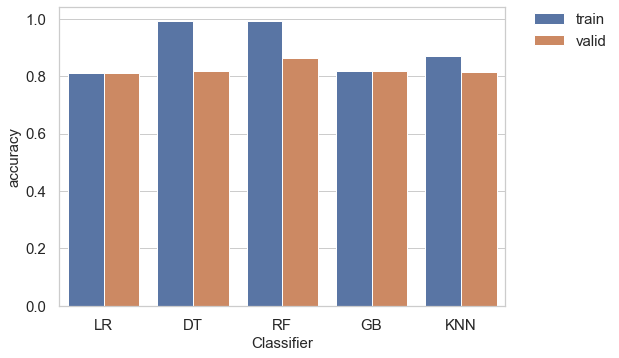

In [615]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('accuracy', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

##### Accuracy is the fraction of predictions our model got right. DT and RF have overfitting problems. Overall RF is the best.

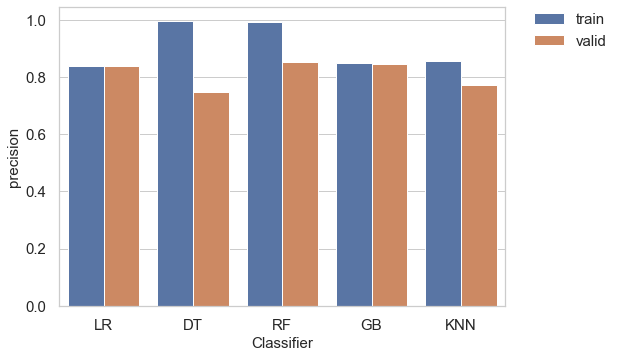

In [616]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('precision', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

##### We need to put emphaisis on the precision rate. And we can tell RF, LR and GB are better.

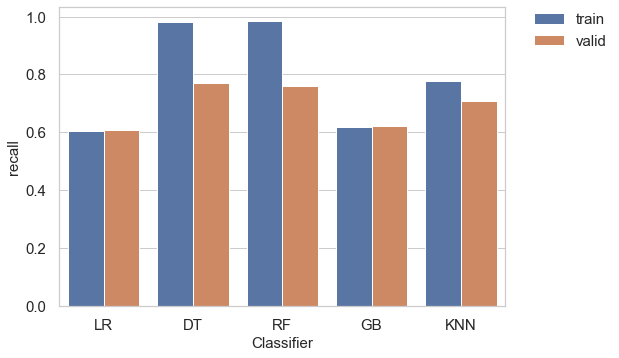

In [617]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('recall', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

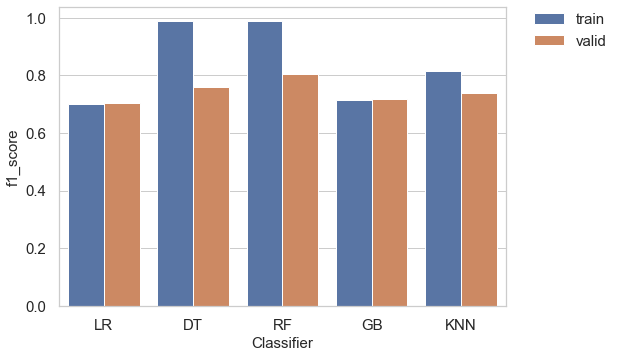

In [618]:
ax = sns.barplot(x="classifier", y="f1", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('f1_score', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

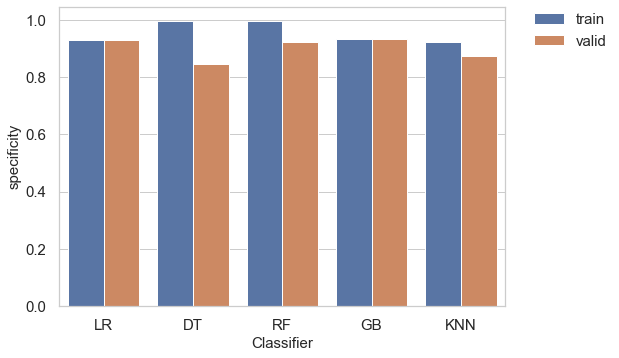

In [619]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('specificity', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

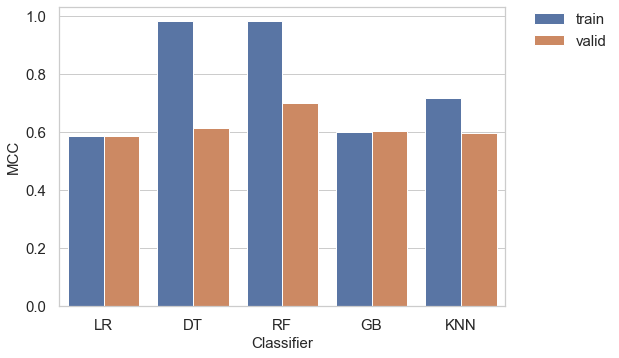

In [620]:
ax = sns.barplot(x="classifier", y="MCC", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize=15)
ax.set_ylabel('MCC', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

### Feature Importance

#### Logistic Regression

In [591]:
lr = LogisticRegression()
lr.fit(X_train_tf, y_train)

/Users/xujiayi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [592]:
feature_importances = pd.DataFrame(lr.coef_[0], index = cols_input,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [593]:
feature_importances.head()

importance
previous_cancellations         2.188156
deposit_type_Non Refund        0.903193
arrival_date_month_December    0.796043
arrival_date_month_November    0.605092
arrival_date_month_October     0.597411

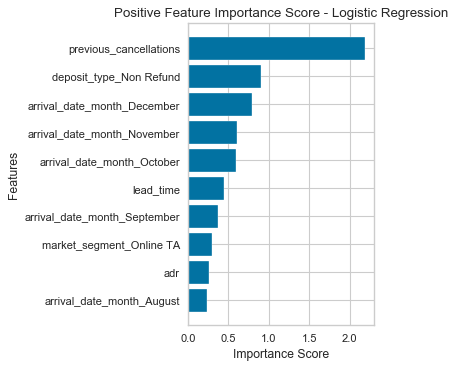

In [602]:
num = np.min([10, len(cols_input)])
ylocs = np.arange(num)

values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(3, 5), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

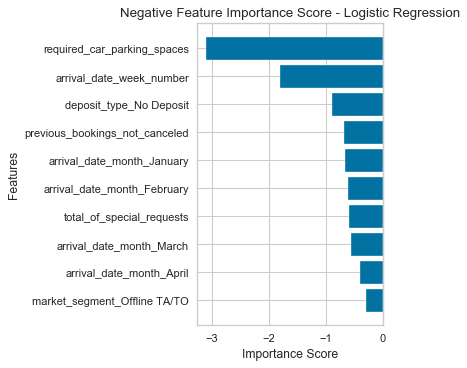

In [603]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(3, 5), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

### Random Forest


In [604]:
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [605]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = cols_input,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [606]:
feature_importances.head()

importance
lead_time                    0.156761
adr                          0.106757
deposit_type_No Deposit      0.082941
arrival_date_day_of_month    0.081788
deposit_type_Non Refund      0.078572

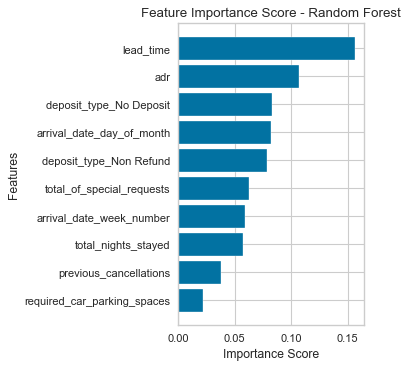

In [607]:
num = np.min([10, len(cols_input)])
ylocs = np.arange(num)

values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(3, 5), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Hyperparameter Tuning

#### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)   

In [634]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [641]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1200,200)

# maximum number of features to use at each split
max_features = ['auto','sqrt']

# maximum depth of the tree
max_depth = range(2,30,2)

# minimum number of samples to split a node
min_samples_split = range(2,10,2)

# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1200, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 30, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [642]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [643]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, 
                               scoring=auc_scoring, verbose = 1, random_state = 42)

In [644]:
rf_random.fit(X_train_tf, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 21.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [645]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 28,
 'criterion': 'gini'}

In [652]:
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random forest
Training AUC:0.999
Validation AUC:0.928
Optimized Random forest
Training AUC:0.996
Validation AUC:0.929


#### Gradient Boosting

In [647]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [648]:
# number of trees
n_estimators = range(30,330,10)

# maximum depth of the tree
max_depth = range(1,11,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid
random_grid_gb = {'n_estimators':n_estimators,
                   'max_depth':max_depth,
                   'learning_rate':learning_rate}

# create the randomized search cross-validation
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid_gb, 
                                n_iter = 20, cv = 2, scoring = auc_scoring, verbose = 0,
                                random_state = 42)

gb_random.fit(X_train_tf, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [650]:
gb_random.best_params_

{'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}

In [657]:
y_train_preds = gb.predict_proba(X_train_tf)[:,1]
y_valid_preds = gb.predict_proba(X_valid_tf)[:,1]

print('Baseline Gradient boosting')
gb_train_base_auc = roc_auc_score(y_train, y_train_preds)
gb_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gb_train_base_auc))
print('Validation AUC:%.3f'%(gb_valid_base_auc))

print('Optimized Gradient boosting')
gb_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gb_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)
y_train_preds_random = gb_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gb_random.best_estimator_.predict_proba(X_valid_tf)[:,1]


print('Training AUC:%.3f'%(gb_train_opt_auc))
print('Validation AUC:%.3f'%(gb_valid_opt_auc))

Baseline Gradient boosting
Training AUC:0.883
Validation AUC:0.879
Optimized Gradient boosting
Training AUC:0.957
Validation AUC:0.916


## Optimization models comparasion

In [658]:
df_results = pd.DataFrame({'classifier':['RF','RF','GB','GB'],
                           'data_set':['baseline','optimized'] * 2,
                           'auc': [rf_valid_base_auc,rf_valid_opt_auc,
                                   gb_valid_base_auc,gb_valid_opt_auc],})

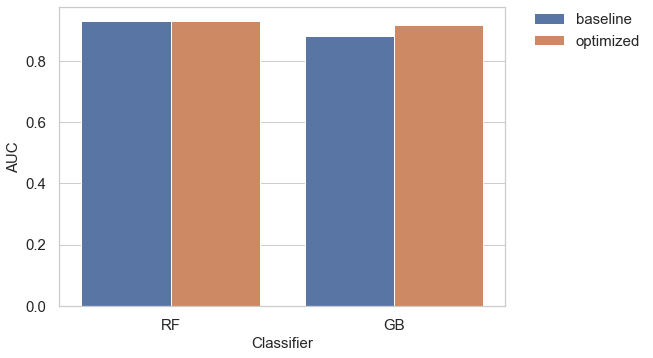

In [659]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## <a id="42">Model Evaluation</a>

In [660]:
import pickle
pickle.dump(gb_random.best_estimator_, open('best_classifier.pkl', 'wb'), protocol = 4)
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [661]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

y_train_pred = best_model.predict(X_train_tf)
y_valid_pred = best_model.predict(X_valid_tf)
y_test_pred = best_model.predict(X_test_tf)

In [663]:
print('Training')
train_accuracy, train_specificity,train_recall,train_precision, train_f1, train_MCC,\
 = show_metrics(y_train,y_train_pred)
print('Validation')
valid_accuracy, valid_specificity, valid_recall, valid_precision, valid_f1, valid_MCC, \
 = show_metrics(y_valid,y_valid_pred)
print('Test')
test_accuracy, test_specificity, test_recall, test_precision, test_f1, test_MCC, \
 = show_metrics(y_test,y_test_pred)

Training
True positive:  24142
False positive:  2630
True negative:  50032
False negative:  6769
accuracy:  0.8875354480514042
specifity:  0.9500588659754662
recall:  0.7810164666300022
Precision:  0.9017630360077693
F1:  0.8370577119775324
MCC:  0.7563954947722075
Validation
True positive:  4853
False positive:  875
True negative:  10367
False negative:  1814
accuracy:  0.8498520297057346
specifity:  0.9221668742216688
recall:  0.727913604319784
Precision:  0.8472416201117319
F1:  0.7830576845502218
MCC:  0.6737692190351575
Test
True positive:  4775
False positive:  860
True negative:  10402
False negative:  1871
accuracy:  0.847498324771052
specifity:  0.9236370094121825
recall:  0.7184772795666566
Precision:  0.8473824312333629
F1:  0.7776239719892517
MCC:  0.6680022681008013


In [664]:
train_auc = roc_auc_score(y_train, y_train_preds)
valid_auc = roc_auc_score(y_valid, y_valid_preds)
test_auc = roc_auc_score(y_test, y_test_preds)

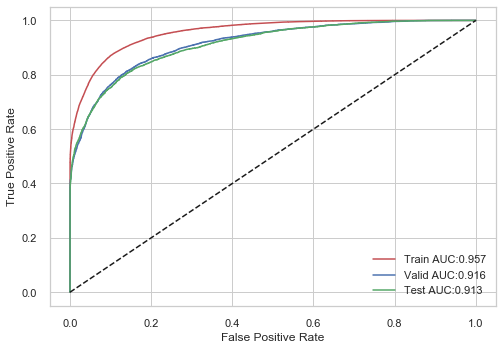

In [665]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()